# Final_Project_Proposal

Yudava Roopnarine

Alejandro Mandujano

Ishrat Amin

Jonathan Bernard

Our final project involves fantasy football. Fantasy football is a game where players simulate the concept of managing a team of football players. Pseudo managers gather before a real-life football season and take turns drafting players from the NFL similar to a pick up basketball game in a park or a gym class. After this draft, each manager should have a team of fifteen players. While rules vary a bit from league to league, each manager should have at least one quarterback (QB), one tight end (TE), two running backs (RB), two wide receivers (WR), one kicker (K), and one defense (DEF), as they will need to start those players in each game. The other players are merely backup until the manager decides to replace a starter for any reason (injury, low performance, etc). Every week for about fourteen weeks (on average), each manager will face another manager in a game where points area determined by their players' performance. Points are determined by each player's statistics for that week. After the week is over, one team wins, another loses, and the managers matchup against other managers in a predetermined schedule similar to a real life football season. After fourteen weeks (on average), the top managers simulate a playoff tournament similar to a real life football season. At the end, one manager is crowned the winner, and he or she gets bragging rights, money (if agreed upon prior to the start), and maybe a trophy (for the really extravagant leagues). Then when the next season starts, they start all over again, usually drafting new players.

Strategy is determined by finding players who perform the best. While during the season, you could always find new players to replace the ones you have, a big part of managers' strategy comes from drafting the right players prior to the season. Managers use stats from prior seasons to determined who they prefer to draft, and who they believe they can get in a later round. Various websites like https://fantasyfootball.theringer.com/ and https://football.fantasysports.yahoo.com/f1/draftanalysis?pos=ALL release speculative draft boards rating the best players each year. Each expert's draft board look very similar with a lot of small changes for various reasons. However, there is one thing that shows up on each draft board each year that's been pretty consistant: RBs are chosen very early and very often. While in the NFL, QBs are always coveted and are always the star of the team, they are a bit of an afterthought in fantasy football. Even though they score more fantasy points on average than RBs, managers rarely draft a QB with their first few picks, instead opting for other positions, especially RBs.

- Why are RBs such a coveted position in fantasy football?
- Why are QBs taken so late in fantasy drafts?
- Is there another position that deserves more preference?

Our dataset is of the fantasy season from 2019. It was downloaded from https://www.fantasyfootballdatapros.com/csv_files . We posted the csv file to github and read it from there.

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jonpb99/Data_Analytics_List_Comprehension/main/2019.csv')
df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,...,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     620 non-null    int64  
 1   Player         620 non-null    object 
 2   Tm             620 non-null    object 
 3   Pos            620 non-null    object 
 4   Age            620 non-null    float64
 5   G              620 non-null    float64
 6   GS             620 non-null    float64
 7   Cmp            620 non-null    float64
 8   Att            620 non-null    float64
 9   Yds            620 non-null    float64
 10  Int            620 non-null    float64
 11  Att.1          620 non-null    float64
 12  Yds.1          620 non-null    float64
 13  Tgt            620 non-null    float64
 14  Rec            620 non-null    float64
 15  Yds.2          620 non-null    float64
 16  Y/R            620 non-null    float64
 17  Fumbles        620 non-null    float64
 18  FumblesLos

The dataset does not contain any nulls. However, it does contain a postion that doesn't exist. Also, the kicker and defense positions are excluded from the original dataset, but that is intentional as they play almost no role in a strategic draft. We plan to show why RBs are the most coveted position in fantasy football despite the QB position usually averaging more points as seen below:

<AxesSubplot:xlabel='Pos', ylabel='FantasyPoints'>

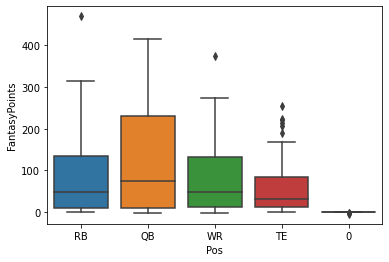

In [3]:
sns.boxplot(x="Pos", y="FantasyPoints", data=df)